In [1]:
import glob

import matplotlib.pyplot as plt
import pandas as pd

from how_to_sample.data import load_pickle_file

In [4]:
base_output_dir = "../outputs/calculate_coverage"

In [10]:
def load_coverage_results(
    model="clip", task="datasets_vs_laion_natural", seed=42, iterations=10
):
    """Load coverage results from calculate_coverage.py outputs."""
    task_dir = f"{base_output_dir}/{model}/{task}"

    if task == "datasets_vs_laion_natural":
        result_pattern = f"coverage_scores_main_seed-{seed}_iterations-{iterations}.pkl"
    elif task == "laion_natural_vs_laion_2b":
        result_pattern = f"laion_natural_vs_laion_2b_scores_iterations-{iterations}_main_seed-{seed}.pkl"
    else:
        raise ValueError(f"Unknown task: {task}")

    result_files = glob.glob(f"{task_dir}/{result_pattern}")

    if not result_files:
        print(f"No results found matching pattern: {task_dir}/{result_pattern}")
        return None

    result_file = result_files[0]
    print(f"Loading results from: {result_file}")
    return load_pickle_file(result_file)


def plot_datasets_vs_laion_coverage(
    model="clip", seed=42, iterations=10, save_path=None
):
    """Plot coverage of LAION-natural by different datasets."""
    results = load_coverage_results(
        model, "datasets_vs_laion_natural", seed, iterations
    )

    if results is None:
        return

    # Prepare data for plotting
    plot_data = [
        {"dataset": "NSD", "coverage": results["nsd_coverage_of_laion_natural"]},
        {"dataset": "THINGS", "coverage": results["things_coverage_of_laion_natural"]},
        {
            "dataset": "Random LAION\nsubset",
            "coverage": results["mean_random_laion_subset_coverage"],
        },
    ]

    plot_df = pd.DataFrame(plot_data)

    # Create plot
    plt.figure(figsize=(8, 6))

    # Plot bars with error bars for random subset
    bars = plt.bar(
        plot_df["dataset"],
        plot_df["coverage"],
        color=["#1FF36F", "#FF005D", "lightgray"],
        alpha=0.8,
    )

    # Add error bar for random subset
    plt.errorbar(
        2,  # Position of random subset bar
        results["mean_random_laion_subset_coverage"],
        yerr=results["std_random_laion_subset_coverage"],
        fmt="none",
        color="black",
        capsize=5,
        capthick=2,
    )

    # Add value labels on top of bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if i == 2:  # Random subset with std
            label = f"{height:.1f}±{results['std_random_laion_subset_coverage']:.1f}%"
        else:
            label = f"{height:.1f}%"

        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + (results["std_random_laion_subset_coverage"] if i == 2 else 0) + 1,
            label,
            ha="center",
            va="bottom",
            fontsize=12,
            fontweight="bold",
        )

    # Customize plot
    plt.xlabel("Dataset", fontsize=14)
    plt.ylabel("Coverage (%)", fontsize=14)
    plt.title(
        f"Coverage of LAION-natural by different datasets\n({model.upper()} features)",
        fontsize=16,
    )
    plt.grid(True, alpha=0.3, axis="y")
    plt.ylim(0, max(plot_df["coverage"]) * 1.2)

    # Save or show plot
    if save_path:
        plt.savefig(save_path, bbox_inches="tight", dpi=300)
        print(f"Plot saved to: {save_path}")
    else:
        plt.show()


def plot_laion_vs_laion2b_coverage(
    model="clip", seed=42, iterations=10, save_path=None
):
    """Plot coverage of LAION-2B by LAION-natural subsets."""
    results = load_coverage_results(
        model, "laion_natural_vs_laion_2b", seed, iterations
    )

    if results is None:
        return

    scores = results["scores"]
    mean_coverage = results["mean_coverage"]
    std_coverage = results["std_coverage"]

    # Create plot
    plt.figure(figsize=(10, 6))

    # Plot individual scores
    plt.scatter(range(1, len(scores) + 1), scores, alpha=0.6, s=50, color="steelblue")

    # Plot mean line
    plt.axhline(
        y=mean_coverage,
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Mean: {mean_coverage:.1f}%",
    )

    # Plot std bands
    plt.fill_between(
        range(1, len(scores) + 1),
        mean_coverage - std_coverage,
        mean_coverage + std_coverage,
        alpha=0.2,
        color="red",
        label=f"±1 std: {std_coverage:.1f}%",
    )

    # Customize plot
    plt.xlabel("Iteration", fontsize=14)
    plt.ylabel("Coverage (%)", fontsize=14)
    plt.title(
        f"Coverage of LAION-2B by random LAION-natural subsets\n({model.upper()} features, {iterations} iterations)",
        fontsize=16,
    )
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)

    # Save or show plot
    if save_path:
        plt.savefig(save_path, bbox_inches="tight", dpi=300)
        print(f"Plot saved to: {save_path}")
    else:
        plt.show()


def plot_all_coverage_results(model="clip", seed=42, iterations=10, save_dir=None):
    """Plot all coverage results."""
    if save_dir is None:
        save_dir = f"{base_output_dir}/{model}"

    save_path1 = (
        f"{save_dir}/datasets_vs_laion_natural_coverage.pdf" if save_dir else None
    )
    plot_datasets_vs_laion_coverage(model, seed, iterations, save_path1)

    save_path2 = (
        f"{save_dir}/laion_natural_vs_laion_2b_coverage.pdf" if save_dir else None
    )
    plot_laion_vs_laion2b_coverage(model, seed, iterations, save_path2)

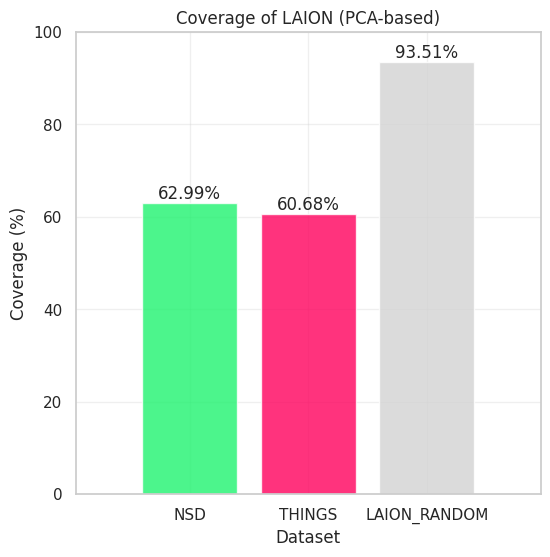

In [11]:
plot_datasets_vs_laion_coverage(model="clip", seed=42, iterations=10)